In [ ]:
from sympy import symbols
import sympy
from sympy import Heaviside, DiracDelta
from ipywidgets import interact, FloatSlider
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from scipy.optimize import fsolve

In [17]:
from plotting_utils import *
load_plot_style()

import os
image_path = os.path.join(os.path.dirname(os.path.abspath('')), 'Report', 'figures', 'curieweiss')

## Curie-Weiss

### Analysis:

In [18]:
beta, J, m, B = symbols('beta J m B')

In [19]:
S = -(1+m)/2 * sympy.ln((1+m)/2) - (1-m)/2 * sympy.ln((1-m)/2)
S

-(1/2 - m/2)*log(1/2 - m/2) + (-m/2 - 1/2)*log(m/2 + 1/2)

In [20]:
phi = sympy.Rational(1, 2) * beta * J * m**2 + beta * B * m + S
phi

B*beta*m + J*beta*m**2/2 - (1/2 - m/2)*log(1/2 - m/2) + (-m/2 - 1/2)*log(m/2 + 1/2)

We can visualize $\phi(m)$ for varying $\beta$, $B$, and $J$.

In [ ]:
def plot_phi(beta_val, J_val, B_val):
   beta_val = float(beta_val)
   J_val = float(J_val)
   B_val = float(B_val)

   eps = 1e-10
   m_vals = np.linspace(-1+eps, 1-eps, 1000)
   lam_phi = sympy.lambdify((beta, J, m, B), phi, 'numpy')
   phi_vals = lam_phi(beta_val, J_val, m_vals, B_val)

   figure(figsize=(6, 6))
   plt.plot(m_vals, phi_vals)
   # plt.title(r'$\phi(m)$')
   plt.xlabel('m')
   plt.ylabel(r'$\phi(m)$')
   plt.grid()
   plt.show()

interact(plot_phi,
   B_val=FloatSlider(min=-5.0, max=5.0, step=0.05, value=0, description='B:'),
   beta_val=FloatSlider(min=0.1, max=5.0, step=0.05, value=2.0, description='β:'),
   J_val=FloatSlider(min=0.1, max=2.0, step=0.1, value=1, description='J:')
)

interactive(children=(FloatSlider(value=2.0, description='β:', max=5.0, min=0.1, step=0.05), FloatSlider(value…

<function __main__.plot_phi(beta_val, J_val, B_val)>

In [22]:
lhs = m
rhs = sympy.tanh(beta * J * m + beta * B)

In [23]:
def plot_lhs_rhs(B_value, beta_value, J_value):
    sympy.plot(lhs.subs([(beta, beta_value), (B, B_value), (J, J_value)]),
               rhs.subs([(beta, beta_value), (B, B_value), (J, J_value)]),
               show=True,
               xlim = (-1.2, 1.2),
               ylim = (-1.2, 1.2)
               )
    
interact(plot_lhs_rhs,
        B_value=FloatSlider(min=-5.0, max=5.0, step=0.05, value=-0.5, description='B:'),
         beta_value=FloatSlider(min=0.1, max=5.0, step=0.05, value=2.0, description='β:'),
         J_value=FloatSlider(min=0.1, max=2.0, step=0.1, value=1, description='J:')
)

interactive(children=(FloatSlider(value=-0.5, description='B:', max=5.0, min=-5.0, step=0.05), FloatSlider(val…

<function __main__.plot_lhs_rhs(B_value, beta_value, J_value)>

### Plots for the report:

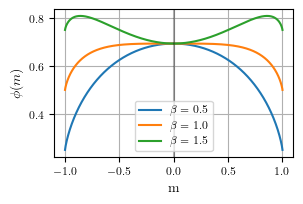

In [30]:
beta_1 = 0.5
beta_2 = 1.0
beta_3 = 1.5
J_val = 1
B_val = 0

eps = 1e-10
m_vals = np.linspace(-1+eps, 1-eps, 1000)
lam_phi = sympy.lambdify((beta, J, m, B), phi, 'numpy')

phi_vals_1 = lam_phi(beta_1, J_val, m_vals, B_val)
phi_vals_2 = lam_phi(beta_2, J_val, m_vals, B_val)
phi_vals_3 = lam_phi(beta_3, J_val, m_vals, B_val)

fig, ax = plt.subplots(1, 1, figsize=set_size(fraction=0.49))
plt.plot(m_vals, phi_vals_1)
plt.plot(m_vals, phi_vals_2)
plt.plot(m_vals, phi_vals_3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.legend([r'$\beta=0.5$', r'$\beta=1.0$', r'$\beta=1.5$'])
plt.xlabel('m')
plt.ylabel(r'$\phi(m)$')
plt.grid()
plt.savefig(os.path.join(image_path, 'm_phi_B0.pdf'), bbox_inches='tight')
plt.show()

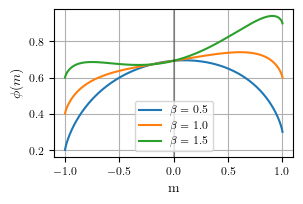

In [29]:
beta_1 = 0.5
beta_2 = 1.0
beta_3 = 1.5
J_val = 1
B_val = 0.1

eps = 1e-10
m_vals = np.linspace(-1+eps, 1-eps, 1000)
lam_phi = sympy.lambdify((beta, J, m, B), phi, 'numpy')

phi_vals_1 = lam_phi(beta_1, J_val, m_vals, B_val)
phi_vals_2 = lam_phi(beta_2, J_val, m_vals, B_val)
phi_vals_3 = lam_phi(beta_3, J_val, m_vals, B_val)


fig, ax = plt.subplots(1, 1, figsize=set_size(fraction=0.49))
plt.plot(m_vals, phi_vals_1)
plt.plot(m_vals, phi_vals_2)
plt.plot(m_vals, phi_vals_3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.legend([r'$\beta=0.5$', r'$\beta=1.0$', r'$\beta=1.5$'])
plt.xlabel('m')
plt.ylabel(r'$\phi(m)$')
plt.grid()
plt.savefig(os.path.join(image_path, 'm_phi_B01.pdf'), bbox_inches='tight')
plt.show()

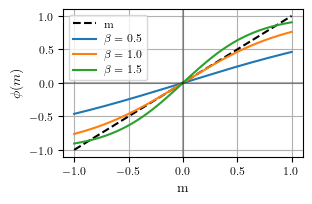

In [49]:
beta_1 = 0.5
beta_2 = 1.0
beta_3 = 1.5
J_val = 1
B_val = 0

eps = 1e-10
m_vals = np.linspace(-1+eps, 1-eps, 1000)
lam_rhs = sympy.lambdify((beta, J, m, B), rhs, 'numpy')

phi_vals_1 = lam_rhs(beta_1, J_val, m_vals, B_val)
phi_vals_2 = lam_rhs(beta_2, J_val, m_vals, B_val)
phi_vals_3 = lam_rhs(beta_3, J_val, m_vals, B_val)

fig, ax = plt.subplots(1, 1, figsize=set_size(fraction=0.49))
plt.plot(m_vals, m_vals, color='k', linestyle='--')
plt.plot(m_vals, phi_vals_1)
plt.plot(m_vals, phi_vals_2)
plt.plot(m_vals, phi_vals_3)
plt.legend([r'm', r'$\beta=0.5$', r'$\beta=1.0$', r'$\beta=1.5$'])
plt.xlabel('m')
plt.ylabel(r'$\phi(m)$')
plt.grid()
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.savefig(os.path.join(image_path, 'rhs_lhs.pdf'), bbox_inches='tight')
plt.show()

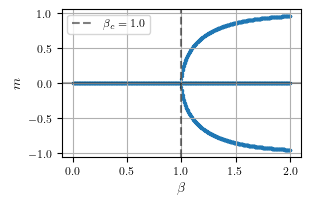

In [50]:
# Create function to solve the self-consistent equation m = tanh(beta*J*m)
def solve_magnetization(beta_val, J_val=1.0):
    # Define equation to solve: m - tanh(beta*J*m) = 0
    def equation(m):
        return m - np.tanh(beta_val * J_val * m)
    
    # Try different initial guesses to find all solutions
    # For beta > critical, we expect 3 solutions (positive, negative, and m=0)
    solutions = []
    for initial_guess in [0.01, 0.5, -0.5]:
        sol = fsolve(equation, initial_guess)
        # Only add unique solutions (with some tolerance)
        if not any(np.isclose(sol, s, atol=1e-6) for s in solutions):
            solutions.append(sol[0])
    
    return np.array(solutions)

# Create range of beta values
eps= 1e-10
beta_range = np.linspace(0+eps, 2-eps, 1000)
J_val = 1.0

# Calculate solutions for each beta
solutions = []
for beta_val in beta_range:
    sols = solve_magnetization(beta_val, J_val)
    for sol in sols:
        solutions.append((beta_val, sol))

# Convert to arrays for plotting
beta_points, m_points = zip(*solutions)

# Plot the results
fig, ax = plt.subplots(figsize=set_size(fraction=0.49))
ax.scatter(beta_points, m_points, s=2)

# Add analytical curve for comparison (for beta > 1 where there's a phase transition)
beta_critical = 1.0  # Critical value for J=1

# Add labels and legend
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$m$')
ax.grid(True)
ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax.axvline(x=beta_critical, color='k', linestyle='--', alpha=0.5, label=r'$\beta_c = 1.0$')
ax.legend()

# Save the figure
plt.savefig(os.path.join(image_path, 'm_vs_beta.pdf'), bbox_inches='tight')
plt.show()

## Bornholdt

In [65]:
alpha, beta, J, m = symbols('alpha beta J m')

In [66]:
phi = beta * J * m**2 - beta*alpha*(m**2)*(2*Heaviside(m)-1) - (1+m)/2 * sympy.log((1 + m)/2) - (1-m)/2 * sympy.log((1 - m)/2)
phi

J*beta*m**2 - alpha*beta*m**2*(2*Heaviside(m) - 1) - (1/2 - m/2)*log(1/2 - m/2) - (m/2 + 1/2)*log(m/2 + 1/2)

In [67]:
phi_diff = sympy.diff(phi, m)
phi_diff = sympy.simplify(phi_diff)
phi_diff

2*J*beta*m - 2*alpha*beta*m**2*DiracDelta(m) - 4*alpha*beta*m*Heaviside(m) + 2*alpha*beta*m + log(1 - m)/2 - log(m + 1)/2

In [68]:
# we recognize the arctanh and substitute it, also the factor with the dirac delta diappears

phi_diff = 2*J*beta*m - 4*alpha*beta*m*Heaviside(m) +4*alpha*beta*m -sympy.atanh(m)
phi_diff = sympy.simplify(phi_diff)
phi_diff

2*J*beta*m - 4*alpha*beta*m*Heaviside(m) + 4*alpha*beta*m - atanh(m)

In [69]:
lhs = sympy.simplify(sympy.tanh(phi_diff + sympy.atanh(m)))
rhs = m
lhs, rhs

(tanh(2*beta*m*(J - 2*alpha*Heaviside(m) + 2*alpha)), m)

In [ ]:
def plot_lhs_rhs(alpha_value, beta_value, J_value):
    sympy.plot(lhs.subs([(beta, beta_value), (alpha, alpha_value), (J, J_value)]),
               rhs.subs([(beta, beta_value), (alpha, alpha_value), (J, J_value)]),
               show=True,
               xlim = (-1.2, 1.2),
               ylim = (-1.2, 1.2)
               )
    
interact(plot_lhs_rhs,
        alpha_value=FloatSlider(min=-5.0, max=5.0, step=0.05, value=-0.5, description='α:'),
         beta_value=FloatSlider(min=0.1, max=5.0, step=0.05, value=2.0, description='β:'),
         J_value=FloatSlider(min=0.1, max=2.0, step=0.1, value=1, description='J:')
)

interactive(children=(FloatSlider(value=-0.5, description='α:', max=5.0, min=-5.0, step=0.05), FloatSlider(val…

<function __main__.plot_lhs_rhs(alpha_value, beta_value, J_value)>

In [71]:
def plot_free_energy(alpha_value, beta_value, J_value):
    sympy.plot(phi.subs([(beta, beta_value), (alpha, alpha_value), (J, J_value)]))

interact(plot_free_energy, 
         alpha_value=FloatSlider(min=-5.0, max=5.0, step=0.05, value=-0.5, description='α:'),
         beta_value=FloatSlider(min=0.1, max=5.0, step=0.05, value=2.0, description='β:'),
         J_value=FloatSlider(min=0.1, max=2.0, step=0.1, value=1, description='J:')
        )

interactive(children=(FloatSlider(value=-0.5, description='α:', max=5.0, min=-5.0, step=0.05), FloatSlider(val…

<function __main__.plot_free_energy(alpha_value, beta_value, J_value)>